Header

In [1]:
import numpy as np
import time
import healpy as hp
import matplotlib.pyplot as plt

import pysht
from pysht import get_geom

lmax, mmax = 1024, 1024
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo, backend='CPU')

In [ ]:
solver = ['DUCC', 'shtns', 'finufft', 'cufinufft', 's2fft'][0]
backend = 'gpu'
transformer = pysht(solver, backend)

synthesis

In [10]:
"""
synthesis
"""

lmax, mmax = 1024, 1024
print(hp.Alm.getsize(lmax))
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo, backend='CPU')
lalm = np.array(np.random.random(size=hp.Alm.getsize(lmax)), dtype=complex)

if tlib.backend == 'CPU':
    s_cpu = tlib.synthesis(lalm.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("s_cpu.shape: {}".format(s_cpu.shape))

525825
s_cpu.shape: (1, 2109450)


In [11]:
tlib = get_geom(geominfo, backend='GPU')
if tlib.backend == 'GPU':
    sh = tlib.init_transformer(lmax, mmax)
    # lalm = sh.spec_array()+1
    # lalm *= np.random.random(size=lalm.shape)
    print("lalm {}, spec_array {}".format(lalm.shape, sh.spec_array().shape))
    s_gpu = tlib.synthesis(lalm.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("s_gpu.shape: {}".format(s_gpu.shape))

lalm (525825,), spec_array (525825,)
s_gpu.shape: (2058, 1032)


In [12]:
s_cpu.reshape(1025,-1).shape

(1025, 2058)

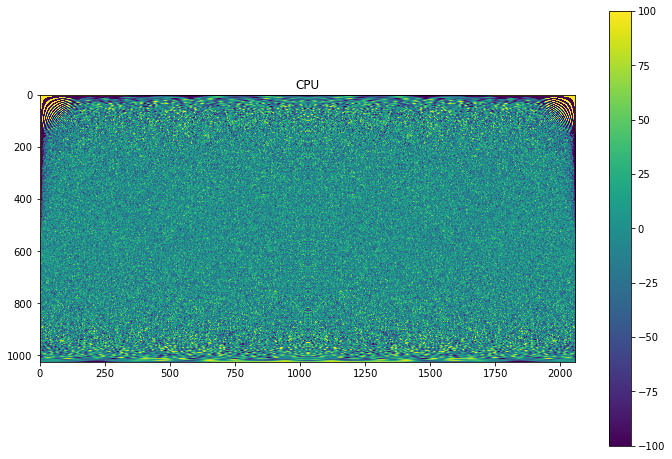

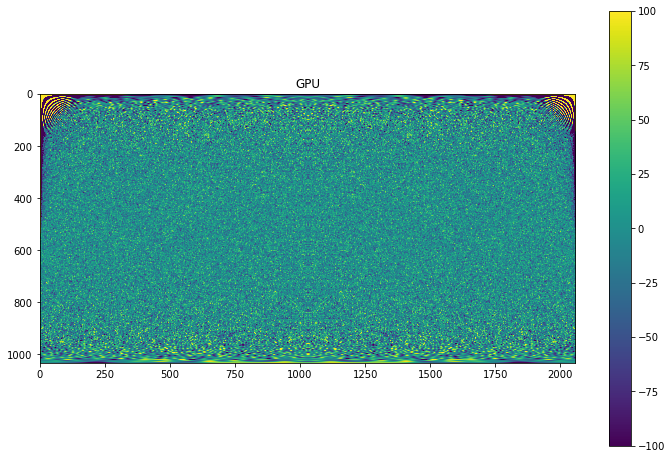

<Figure size 864x576 with 0 Axes>

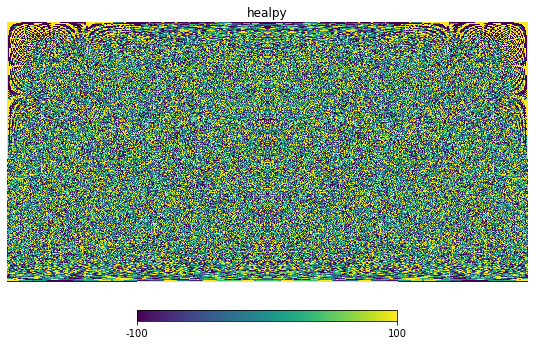

In [13]:
"""
DUCC CPU agrees with SHTns gpu, but they have different grids
"""

plt.figure(figsize=(12,8))
plt.imshow(np.roll(s_cpu.reshape(1025,-1),1029, axis=1), vmin=-100, vmax=100)
plt.colorbar()
plt.title('CPU')
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(np.roll(s_gpu.T,1029, axis=1), vmin=-100, vmax=100)
plt.colorbar()
plt.title('GPU')
plt.show()


plt.figure(figsize=(12,8))
hp.cartview(hp.alm2map(lalm, nside=512), cbar=True, min=-100, max=100)
plt.title('healpy')
plt.show()

adjoint synthesis

In [14]:
"""
adjoint_synthesis. I am using the maps generated from the alm2map in the previous cells so that spectra should be identical
"""
lmax, mmax = 1024, 1024
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo, backend='CPU')
 # np.array(np.random.random(size=tlib.npix()))

if tlib.backend == 'CPU':
    # Fix weighting
    lmap = s_cpu
    print(lmap)
    adj_cpu = tlib.adjoint_synthesis(lmap.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("adj_cpu.shape: {}".format(adj_cpu.shape))
    print(adj_cpu)

[[-451.52813124 -451.52801879 -451.52768134 ...  198.20449128
   198.20906628  198.21181136]]
adj_cpu.shape: (1, 525825)
[[0.05177387+0.00000000e+00j 0.47842166+0.00000000e+00j
  0.02956408+0.00000000e+00j ... 0.69667045-4.11909482e-17j
  0.73137955-7.47888375e-17j 0.55468419+5.36327693e-17j]]


In [15]:
tlib = get_geom(geominfo, backend='GPU')
if tlib.backend == 'GPU':
    sh = tlib.init_transformer(lmax, mmax)
    # lalm = sh.spec_array()
    # lmap_shape = s_gpu # sh.spat_array().shape
    # print("lmap spat_array {}".format(sh.spat_array().shape))
    # lmap_random = np.random.random(size=lmap_shape)
    lmap = s_gpu
    print(lmap.shape)
    adj_gpu = tlib.adjoint_synthesis(lmap.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    print("adj_gpu.shape: {}".format(adj_gpu.shape))
    print(adj_gpu)

(2058, 1032)
adj_gpu.shape: (1, 525825)
[[1.11537747e-09+0.00000000e+00j 1.03067569e-08+0.00000000e+00j
  6.36906269e-10+0.00000000e+00j ... 1.50085449e-08+1.67763541e-24j
  1.57562917e-08+2.02082823e-24j 1.19496997e-08-6.30040380e-25j]]


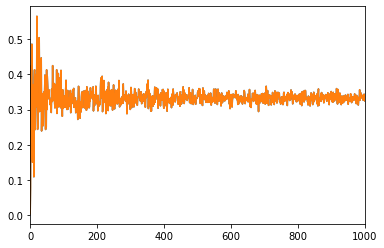

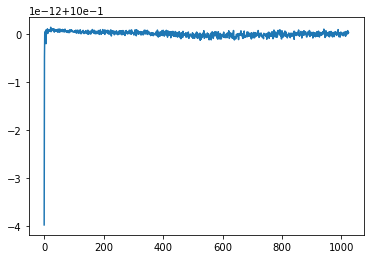

In [16]:
factor = np.mean(hp.alm2cl(adj_cpu[0])/hp.alm2cl(adj_gpu[0]))

# adj_cpu.shape
plt.plot(hp.alm2cl(adj_cpu[0]))
plt.plot(hp.alm2cl(adj_gpu[0])*factor)
plt.xlim(0,1000)
# plt.loglog()
plt.show()

plt.plot(hp.alm2cl(adj_cpu[0])/(hp.alm2cl(adj_gpu[0])*factor))

plt.plot()
plt.show()
# plt.loglog()

synthesis_general

In [1]:
"""
synthesis_general
"""
import numpy as np
import time
import healpy as hp
import matplotlib.pyplot as plt

import pysht
from pysht import get_geom


lmax, mmax = 2048, 2048
geominfo = ('gl',{'lmax': lmax})
tlib = get_geom(geominfo, backend='CPU')

In [2]:
# lalm = np.array(np.random.random(size=hp.Alm.getsize(lmax)), dtype=complex)
# dlm = np.array(np.random.random(size=hp.Alm.getsize(lmax)), dtype=complex)*1e-10
# tlib.set_backend('CPU')

# if tlib.backend == 'CPU':
#     s_cpu = tlib.synthesis_general(lalm.copy(), dlm=dlm, epsilon=1e-8, mmax=lmax, spin=0, backwards=False)
#     print("s_cpu.shape: {}".format(s_cpu.shape))
# fig  = plt.figure(figsize=(12,8))
# plt.imshow(s_cpu[0].reshape(2049,-1), vmin=-50, vmax=50)
# plt.colorbar()

In [4]:
import delensalot
from delensalot import utils
from delensalot.sims.sims_lib import Xunl, Xsky, Xobs
print(lmax)
geominfo = ('gl',{'lmax': lmax})
synunl = Xunl(lmax=lmax, geominfo=geominfo)
Tunl = synunl.get_sim_unl(0, spin=0, space='alm', field='temperature')
phi = synunl.get_sim_phi(0, space='alm')*1e6

mpisupport: True, pmisupport: False
disabling mpi
2048


In [11]:
synsky = Xsky(lmax=lmax, unl_lib=synunl, geominfo=geominfo)
# synsky.lenjob_geominfo
Tsky = synsky.get_sim_sky(0, spin=0, space='map', field='temperature')

A
[ 0.00000000e+00+0.j          2.24724699e+01+0.j
  3.22281097e+01+0.j         ... -1.05755991e-02-0.00726583j
 -2.11846122e-02+0.00323508j  2.26302301e-02-0.00361177j] [ 0.00000000e+00+0.00000000e+00j  1.38034496e-04+0.00000000e+00j
  2.26476370e-04+0.00000000e+00j ... -3.24791627e-08-2.23143778e-08j
 -6.50468410e-08+9.93322861e-09j  6.94855761e-08-1.10898411e-08j] 0 ('thingauss', {'lmax': 3072, 'smax': 3}) 1e-07 0 0
(12776092, 2)
lenspyx  2048 2048 (1, 2100225) (12776092, 2) 0 1e-07 16 STANDARD 0
lenspyx  [[ 0.00000000e+00+0.j          2.24724699e+01+0.j
   3.22281097e+01+0.j         ... -1.05755991e-02-0.00726583j
  -2.11846122e-02+0.00323508j  2.26302301e-02-0.00361177j]] [[1.50488999e-03 8.30715610e-01]
 [1.52192319e-03 8.40614236e-01]
 [1.53863894e-03 8.50655670e-01]
 ...
 [3.14093126e+00 8.83672244e-01]
 [3.14091207e+00 9.06311006e-01]
 [3.14089289e+00 9.28565621e-01]]
B
C
D


In [9]:
# phi = synunl.get_sim_phi(0, space='alm')*1e6
tlib.set_backend('CPU')
ll = np.arange(0,lmax)

if tlib.backend == 'CPU':
    s_cpu = tlib.synthesis_general(Tunl.copy(), dlm=hp.almxfl(phi,  np.sqrt(ll*(ll+1))), epsilon=1e-8, mmax=lmax, spin=0, backwards=False)
    print("s_cpu.shape: {}".format(s_cpu.shape))
import lenpsyx
lp = lenspyx.alm2lenmap_spin(Tunl.copy(), hp.almxfl(phi,  np.sqrt(ll*(ll+1))), geometry=geominfo)

[[1.46963173 1.35568112]
 [2.21660708 4.49645199]
 [1.24170146 1.35525741]
 ...
 [1.98879748 2.11866523]
 [0.69966993 2.12033064]
 [0.87391631 5.25993278]]
pysht  2048 2048 (1, 2100225) (8851680, 2) 0 1e-08 4 STANDARD 1
pysht  [[ 0.00000000e+00+0.j          2.24724699e+01+0.j
   3.22281097e+01+0.j         ... -1.05755991e-02-0.00726583j
  -2.11846122e-02+0.00323508j  2.26302301e-02-0.00361177j]] [[1.46963173 1.35568112]
 [2.21660708 4.49645199]
 [1.24170146 1.35525741]
 ...
 [1.98879748 2.11866523]
 [0.69966993 2.12033064]
 [0.87391631 5.25993278]]
s_cpu.shape: (1, 8851680)



Total wall clock time for synthesis_general: 4.012s
|
+- getPlane                          : 53.57% (2.1493s)
|  |
|  +- alm2leg                           : 79.41% (1.7067s)
|  +- theta resampling and deconvolution: 11.82% (0.2540s)
|  +- phi FFT and dconvolution          :  8.74% (0.1879s)
|  +- dealing with borders              :  0.03% (0.0006s)
|  
+- interpol (u2nu)                   : 46.43% (1.8627s)
+- SphereInterpol setup              :  0.00% (0.0002s)
+- build_planes                      :  0.00% (0.0000s)
+- setup                             :  0.00% (0.0000s)


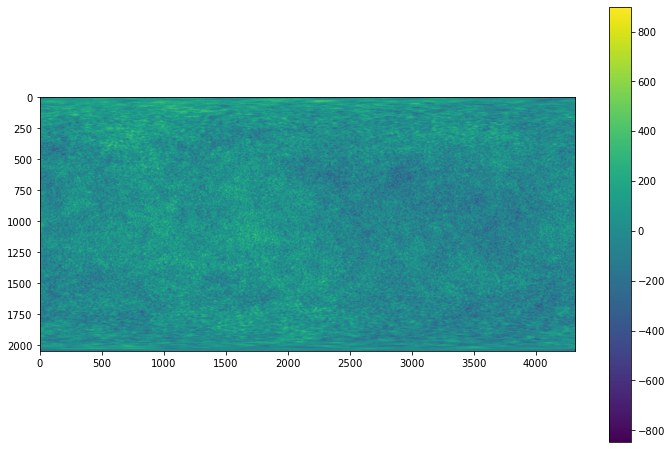

In [10]:
fig  = plt.figure(figsize=(12,8))
plt.imshow((nodefl[0]-s_cpu[0]).reshape(2049,-1))
plt.colorbar()

In [12]:
nodefl = tlib.synthesis(Tunl.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
nodefl.shape

(1, 8851680)

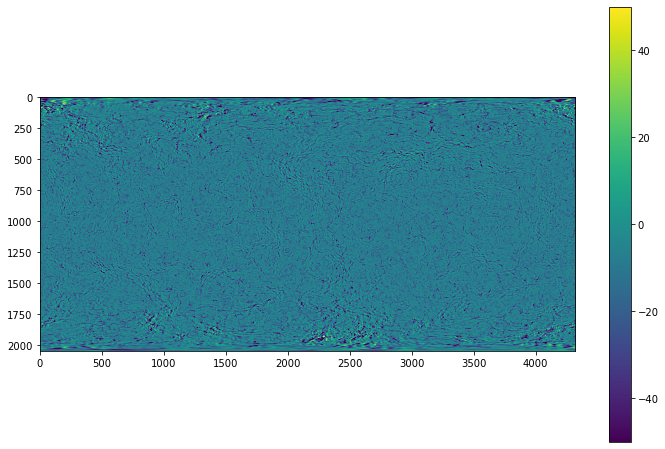

In [13]:
fig  = plt.figure(figsize=(12,8))
plt.imshow((nodefl[0]-Tsky).reshape(2049,-1), vmin=-50,vmax=50)
plt.colorbar()

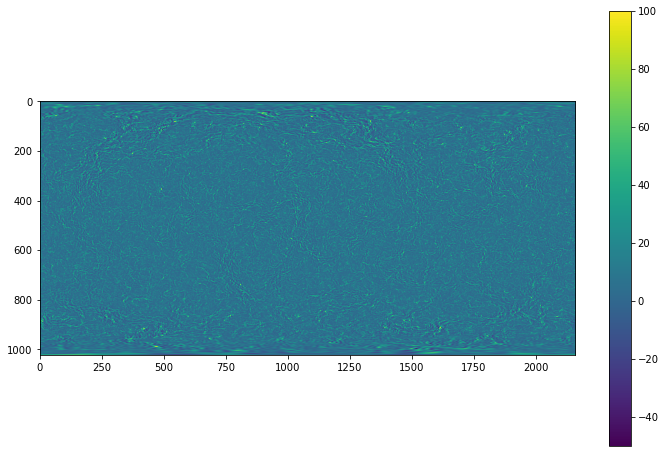

In [11]:
fig  = plt.figure(figsize=(12,8))
plt.imshow((Tsky-s_cpu[0]).reshape(1025,-1), vmin=-50,vmax=50)
plt.colorbar()

In [10]:
nod = nodefl[0].astype(complex)
from lenspyx.utils_hp import Alm
Alm.getlmax(nod.size, mmax)

2671

In [11]:
hp.alm2cl(nod)

array([], dtype=float64)